In [1]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('样本数，  ， ')
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
# im = plt.imshow(x_train[0], cmap='gray')
# plt.show()
y_train[0]

样本数，  ， 
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


5

In [4]:
# x标签处理
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# y标签处理
# 5 -> [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
# 构建模型
model = Sequential()
# 第一个隐藏层
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
# 第二个隐藏层
model.add(Dense(256, activation='relu'))
#  输出层
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


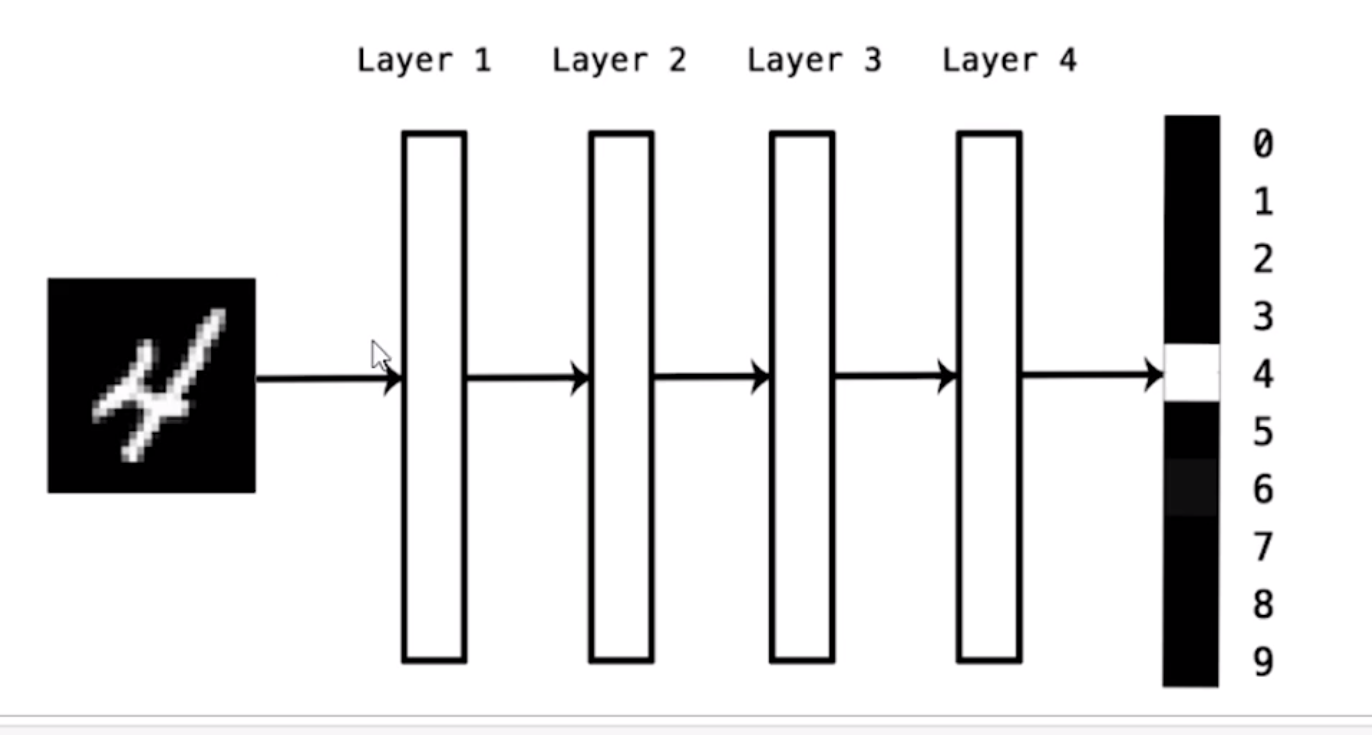

In [8]:
# 模型编译
model.compile(optimizer=SGD(), loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
# 模型训练
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.7672 - acc: 0.8159 - val_loss: 0.3696 - val_acc: 0.9032
Epoch 2/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.3363 - acc: 0.9065 - val_loss: 0.2881 - val_acc: 0.9215
Epoch 3/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.2783 - acc: 0.9218 - val_loss: 0.2504 - val_acc: 0.9304
Epoch 4/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.2448 - acc: 0.9325 - val_loss: 0.2261 - val_acc: 0.9348
Epoch 5/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.2201 - acc: 0.9384 - val_loss: 0.2051 - val_acc: 0.9403


In [10]:
# 训练结构评估
score = model.evaluate(x_test, y_test)
print('LOSS', score[0])
print('ACCU', score[1])

10000/10000 [==============================] - 1s 72us/step


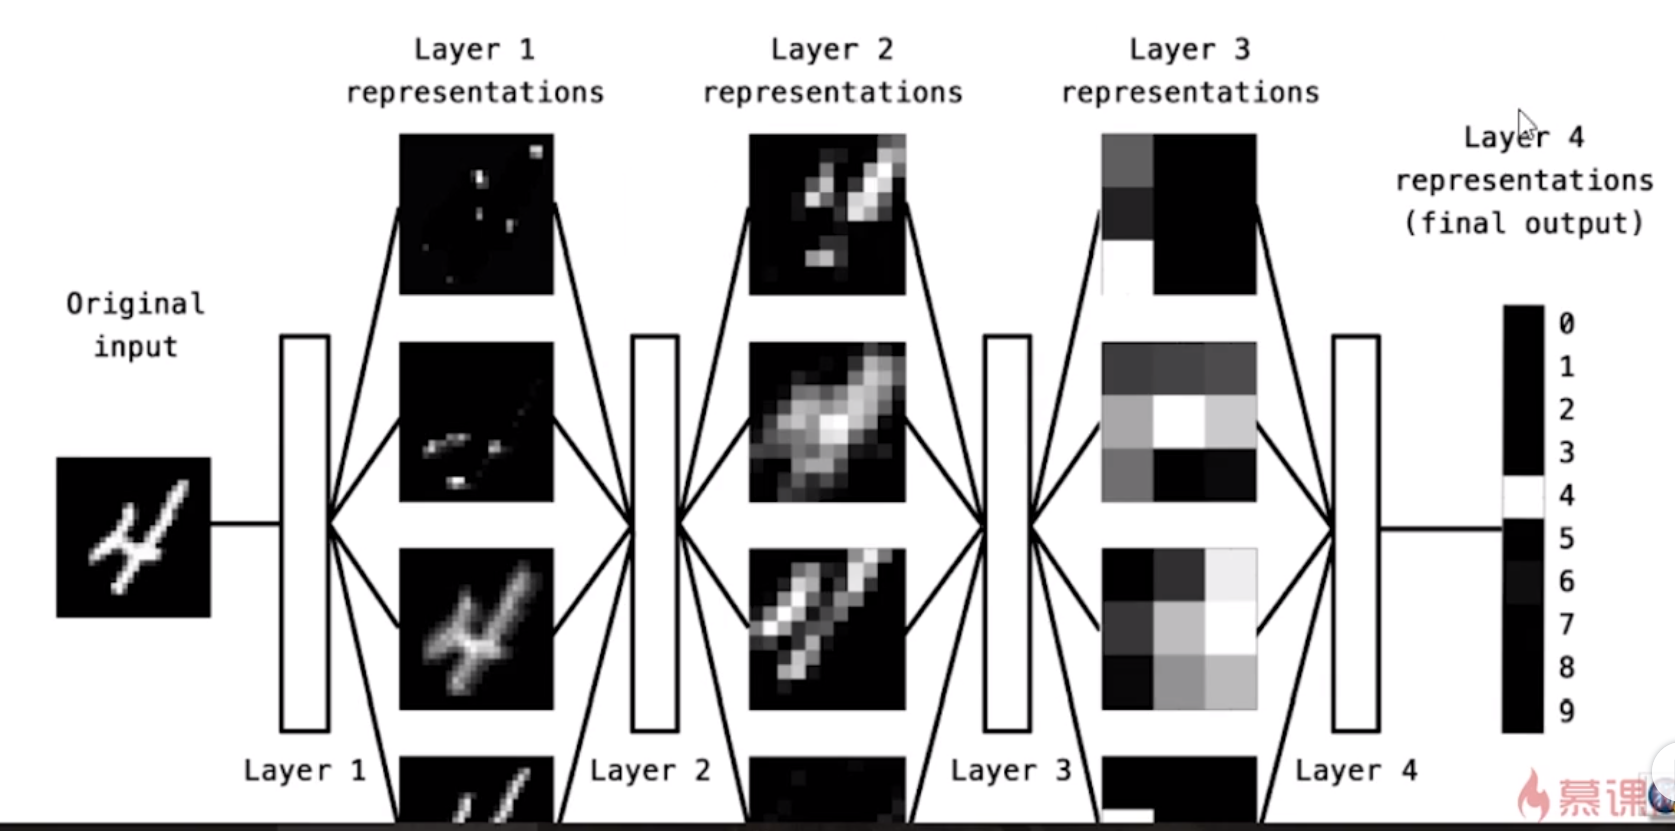